In [2]:
from task2vec import Task2Vec
from models import get_model
import datasets
import task_similarity

In [10]:
dataset_names = ('stl10', 'mnist', 'cifar10','cifar100','kmnist')
# Change `root` with the directory you want to use to download the datasets
dataset_list = [datasets.__dict__[name](root='./data')[0] for name in dataset_names] 

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [11]:
from ipywidgets import IntProgress, interact

In [12]:
no_of_samples = 0
embeddings = []
embedding_labels = []
embedding_encoded_labels = []
j = 0
for name, dataset in zip(dataset_names, dataset_list):
    print(f"Embedding {name}")
    probe_network = get_model('resnet34', pretrained=True, num_classes=int(max(dataset.targets)+1)).cuda()
    task2vec = Task2Vec(probe_network, max_samples=1000, skip_layers=6)
    embeddings.append(task2vec.embed(dataset))
    embedding_labels.append(name)
    embedding_encoded_labels.append(j)
    for i in range(no_of_samples):
        embeddings.append(task2vec.extract_embedding(task2vec.model))
        embedding_labels.append(name)
        embedding_encoded_labels.append(j)
    j+=1

Embedding stl10


Caching features:   0%|          | 0/14 [00:00<?, ?it/s]

Fitting classifier:   0%|          | 0/10 [00:00<?, ?it/s]

Computing Fisher:   0%|          | 0/156 [00:00<?, ?it/s]

Embedding mnist
0it [06:39, ?it/s]


Caching features:   0%|          | 0/14 [00:00<?, ?it/s]

Fitting classifier:   0%|          | 0/10 [00:00<?, ?it/s]

Computing Fisher:   0%|          | 0/156 [00:00<?, ?it/s]

Embedding cifar10


Caching features:   0%|          | 0/14 [00:00<?, ?it/s]

Fitting classifier:   0%|          | 0/10 [00:00<?, ?it/s]

Computing Fisher:   0%|          | 0/156 [00:00<?, ?it/s]

Embedding cifar100


Caching features:   0%|          | 0/14 [00:00<?, ?it/s]

Fitting classifier:   0%|          | 0/10 [00:00<?, ?it/s]

Computing Fisher:   0%|          | 0/156 [00:00<?, ?it/s]

Embedding kmnist


Caching features:   0%|          | 0/14 [00:00<?, ?it/s]

Fitting classifier:   0%|          | 0/10 [00:00<?, ?it/s]

Computing Fisher:   0%|          | 0/156 [00:00<?, ?it/s]

In [13]:
embeddings

In [31]:
import torch
import pandas as pd
embeddings_raw = torch.tensor([t.hessian for t in embeddings])

In [38]:
embeddings_raw[0].shape

torch.Size([13824])

## They tend to be these really huge dimensional vectors (~14000 dims), with very sparse values. 

 ***Embeddings on CIFAR, MNIST, STL below:***

count	1.382400e+04

### mean	1.665499e-04

std	6.080476e-05

min	1.583324e-08

25%	4.852211e-07

50%	1.193354e-06

### 75%	5.218958e-05	

### max	1.560648e-03

In [37]:
pd.DataFrame(embeddings_raw.T.cpu().detach().numpy()).describe()

,0,1,2,3,4
count,1.382400e+04,1.382400e+04,1.382400e+04,1.382400e+04,1.382400e+04
mean,3.266237e-05,1.665499e-04,2.895502e-04,1.581998e-04,3.428780e-04
std,6.080476e-05,3.241008e-04,4.929749e-04,2.648486e-04,6.036183e-04
min,1.583324e-08,5.405716e-08,1.379947e-07,1.844511e-07,2.303315e-07
25%,4.852211e-07,2.647069e-06,4.554064e-06,2.397934e-06,5.921562e-06
50%,1.193354e-06,7.619101e-06,1.157155e-05,6.262517e-06,1.527362e-05
75%,5.218958e-05,2.318692e-04,4.874205e-04,2.729636e-04,5.387135e-04
max,1.560648e-03,3.857808e-03,1.275142e-02,5.704879e-03,9.253855e-03


In [29]:
task_similarity.pdist(embeddings)

array([[0.        , 0.24702597, 0.12803048, 0.10807019, 0.20631146],
       [0.24702597, 0.        , 0.14751291, 0.15037149, 0.08791268],
       [0.12803048, 0.14751291, 0.        , 0.04158223, 0.09745222],
       [0.10807019, 0.15037149, 0.04158223, 0.        , 0.09844726],
       [0.20631146, 0.08791268, 0.09745222, 0.09844726, 0.        ]])

In [27]:
embeddings_raw.shape

torch.Size([5, 13824])

In [28]:
torch.matmul(embeddings_raw,embeddings_raw.T)

tensor([[6.8473e-05, 2.7208e-04, 5.1049e-04, 2.6292e-04, 5.5538e-04],
        [2.7208e-04, 1.8487e-03, 2.4882e-03, 1.2859e-03, 3.2108e-03],
        [5.1049e-04, 2.4882e-03, 4.7609e-03, 2.3930e-03, 5.0823e-03],
        [2.6292e-04, 1.2859e-03, 2.3930e-03, 1.3037e-03, 2.6282e-03],
        [5.5538e-04, 3.2108e-03, 5.0823e-03, 2.6282e-03, 6.5888e-03]])

In [33]:
embeddings

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [28]:
embeddings_raw = [t.hessian for t in embeddings]
X_train, y_train = embeddings_raw, embedding_encoded_labels

Automatically created module for IPython interactive environment


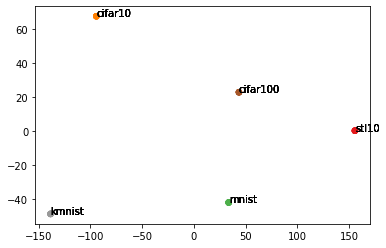

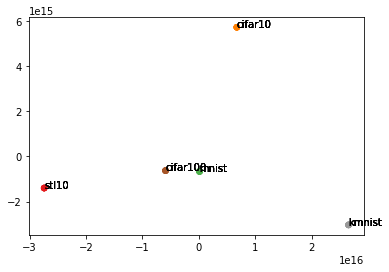

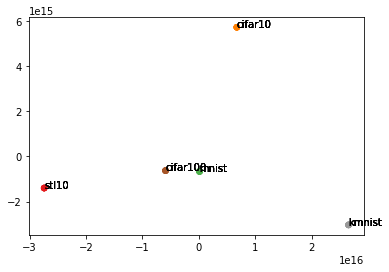

In [29]:

print(__doc__)

n_neighbors = 3
random_state = 0

# Load Digits dataset
X_train, y_train = embeddings_raw, embedding_encoded_labels
dim = len(X_train[0])
n_classes = len(np.unique(y_train))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [('PCA', pca), ('LDA', lda), ('NCA', nca)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X_train)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_train, s=30, cmap='Set1')
    for i in range(len(y)):
        plt.text(X_embedded[i, 0], X_embedded[i, 1],  embedding_labels[i])
plt.show()

In [30]:
#%matplotlib notebook


In [34]:
%matplotlib widget
print(__doc__)

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
X, y = embeddings_raw, embedding_encoded_labels

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
for i in range(len(y)):
    ax.text(X_reduced[i, 0], X_reduced[i, 1], X_reduced[i, 2], embedding_labels[i])
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

Automatically created module for IPython interactive environment


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [15]:
X_reduced

array([[ 0.03630121, -0.00161826, -0.0046228 ],
       [ 0.03630121, -0.00161826, -0.0046228 ],
       [ 0.03630121, -0.00161826, -0.0046228 ],
       [ 0.03630121, -0.00161826, -0.0046228 ],
       [ 0.03630121, -0.00161826, -0.0046228 ],
       [ 0.03630121, -0.00161826, -0.0046228 ],
       [ 0.00516751, -0.01203246,  0.01038058],
       [ 0.00516751, -0.01203246,  0.01038058],
       [ 0.00516751, -0.01203246,  0.01038058],
       [ 0.00516751, -0.01203246,  0.01038058],
       [ 0.00516751, -0.01203246,  0.01038058],
       [ 0.00516751, -0.01203246,  0.01038058],
       [-0.01802061,  0.01784836,  0.00406767],
       [-0.01802061,  0.01784836,  0.00406767],
       [-0.01802061,  0.01784836,  0.00406767],
       [-0.01802061,  0.01784836,  0.00406767],
       [-0.01802061,  0.01784836,  0.00406767],
       [-0.01802061,  0.01784836,  0.00406767],
       [ 0.01251255,  0.00601592, -0.00342161],
       [ 0.01251255,  0.00601592, -0.00342161],
       [ 0.01251255,  0.00601592, -0.003

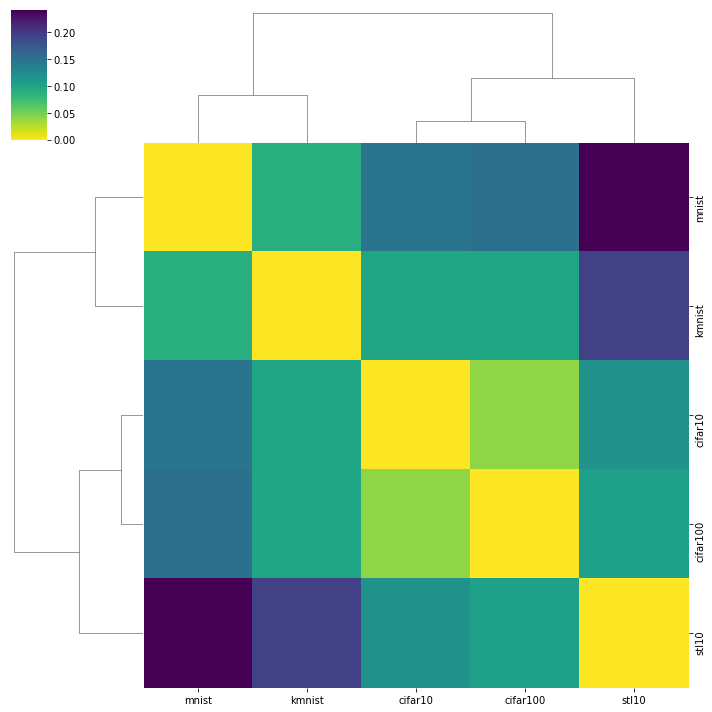

In [7]:
task_similarity.plot_distance_matrix(embeddings, dataset_names)

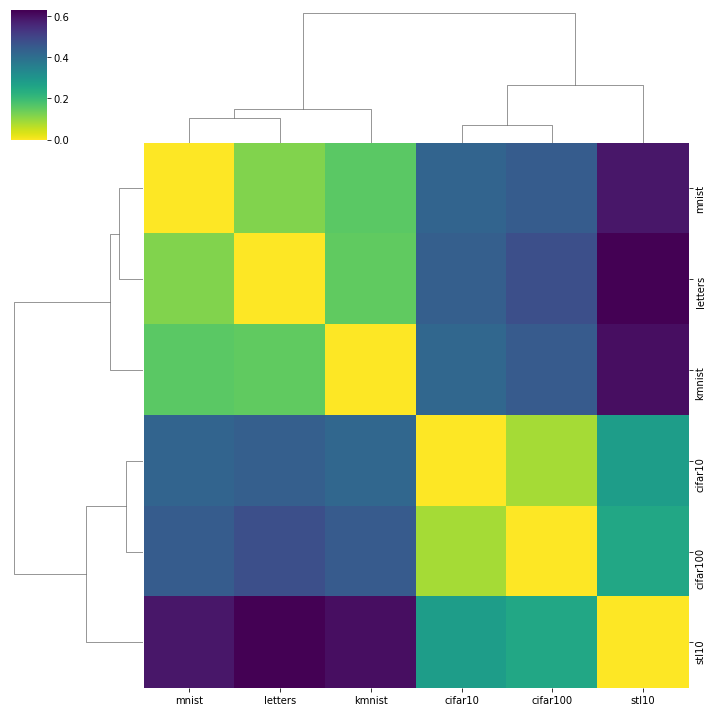

In [4]:
task_similarity.plot_distance_matrix(embeddings, dataset_names)